In [91]:
import numpy as np
import pandas as pd
import tensorflow
import seaborn as sns

In [92]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [93]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
train_data.shape

(891, 12)

In [96]:
test_data.shape

(418, 11)

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [99]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [101]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

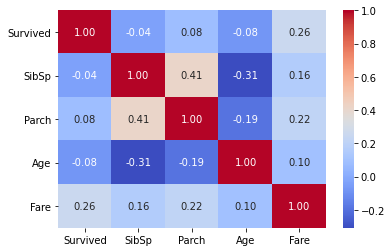

In [103]:
g = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

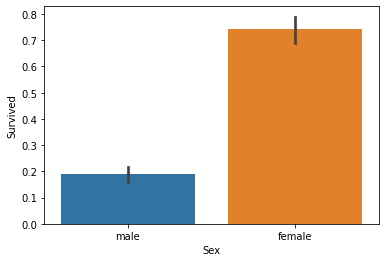

In [104]:
gi = sns.barplot(x = "Sex", y = "Survived", data = train_data)
gi = g.set_ylabel("Survival Probability")

In [105]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

In [106]:
train_data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [107]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
test_data["Age"] = test_data["Age"].fillna(test_data["Age"].mean())

In [109]:
test_data["Age"].head()

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [110]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [111]:
train_data["Cabin"] = train_data["Cabin"].fillna(train_data["Cabin"].mode()[0])
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [112]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [113]:
test_data["Cabin"] = test_data["Cabin"].fillna(test_data["Cabin"].mode()[0])
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].mode()[0])

In [114]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [115]:
train_data = train_data.fillna(np.nan)

test_data = test_data.fillna(np.nan)

In [116]:
train_data.drop(["Name"], axis=1, inplace = True)

In [117]:
test_data.drop(["Name"], axis=1, inplace = True)

In [118]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [120]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [121]:
encode_train_data = train_data[["Sex", "Ticket", "Cabin", "Embarked"]].apply(enc.fit_transform)

In [122]:
encode_test_data = test_data[["Sex", "Ticket", "Cabin", "Embarked"]].apply(enc.fit_transform)

In [123]:
encode_train_data

,Sex,Ticket,Cabin,Embarked
0,1,523,47,2
1,0,596,81,0
2,0,669,47,2
3,0,49,55,2
4,1,472,47,2
...,...,...,...,...
886,1,101,47,2
887,0,14,30,2
888,0,675,47,2
889,1,8,60,0


In [124]:
encode_test_data

,Sex,Ticket,Cabin,Embarked
0,1,152,15,1
1,0,221,15,2
2,1,73,15,1
3,1,147,15,2
4,0,138,15,2
...,...,...,...,...
413,1,267,15,2
414,0,324,22,0
415,1,346,15,2
416,1,220,15,2


In [125]:
train_data[["Sex", "Ticket", "Cabin", "Embarked"]] = encode_train_data[["Sex", "Ticket", "Cabin", "Embarked"]]

In [126]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,1,26.000000,0,0,8,30.0000,60,0


In [127]:
test_data[["Sex", "Ticket", "Cabin", "Embarked"]] = encode_test_data[["Sex", "Ticket", "Cabin", "Embarked"]]

In [131]:
test_data.drop(labels=["Survived"],axis = 1,inplace=True)

KeyError: "['Survived'] not found in axis"

In [133]:
train_data.shape

(891, 11)

In [134]:
test_data.shape

(418, 10)

In [136]:
train_data["Survived"] = train_data["Survived"].astype(int)

In [137]:
Y_train = train_data["Survived"]

X_train = train_data.drop(labels = ["Survived"],axis = 1)

In [140]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [141]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,523,7.2500,47,2
1,2,1,0,38.0,1,0,596,71.2833,81,0
2,3,3,0,26.0,0,0,669,7.9250,47,2
3,4,1,0,35.0,1,0,49,53.1000,55,2
4,5,3,1,35.0,0,0,472,8.0500,47,2


In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
model = GradientBoostingClassifier(learning_rate=0.7,max_depth = 3,n_estimators =100)
model.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.7)

In [162]:
Score = model.score(X_train, Y_train)
print("Score: %.2f%%" % (Score * 100.0))

Score: 100.00%


In [163]:
predictions = model.predict(test_data)

In [167]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

In [168]:
output

,PassengerId,Survived
0,892,1
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [169]:
output.to_csv('data_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
